# Setting up Drive and Git

augumented 20  chose (1-10)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# %cd /content/drive/MyDrive
# !ls

/content/drive/MyDrive
'10improved data_ZH_FAQ_training.ipynb'   model_fixed
 1augumented_training.yml		  Personal
'A&B 深圳.gdoc'				  random
'ASOS report _haoyang.gdoc'		 'reference 参考.gdoc'
 ayo-faq				 'result plot.ipynb'
 cl_result_plot.ipynb			  T5_augumented
'Colab Notebooks'			  T5.ipynb
'confident learning_asos.ipynb'		  T5_zhai_haoyang.ipynb
 cv_augumented_train.ipynb		  Untitled0.ipynb
 FAQonlyT5.ipynb			  ZH_FAQ_training.ipynb
 fine_tune.ipynb			  无标题电子表格.gsheet
 gpt3					  未命名的地图.gmap
 hf_asos				  项目计划书.gdoc


In [ ]:
# Checkout correct branch
# %cd hf_asos/ayo-faq

# !ls

/content/drive/MyDrive/hf_asos/ayo-faq
 CL_all_mlp.png         LICENSE
 cl_data_size.png       models
 CL_pipe1.png	        nlu.yml
 CL_pipe2_mlp.png       notebooks
 CL_pipe3_mlp.png       rasa-faq
 configs	        README.md
 content	        requirements.txt
 cvmodels	        results
 cvresult	        Results_Comparison
 data		        Results_Comparison_Domain
 data_diff.yml	        Results_Comparison_Domain1
 evaluation_score       Results_P1_nlu
 figure		       'the size of data after confident learning.png'
 gridresults_Tutorial


In [1]:
# Install requirements
!pip3 install -r requirements.txt -q
!pip3 install "prompt_toolkit==2.0.1" -q
!pip3 install -U ipython -q

In [2]:
!pip3 install rasa[convert]

# AD - Pipeline 1: no pre-trained word embeddings (CountVectorsFeaturizer + DIETClassifier)

In [3]:
# Printing config file
ConfigFile_path = "/content/drive/MyDrive/hf_asos/ayo-faq/configs/config-DIET.yml"
ConfigFile = open(ConfigFile_path, "r")
print(ConfigFile.read())

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/hf_asos/ayo-faq/configs/config-DIET.yml'

In [5]:
# for i in range(1,6):

#   !rasa train nlu --nlu /content/drive/MyDrive/hf_asos/ayo-faq/data/{i}cv_original_train.yml --config /content/drive/MyDrive/hf_asos/ayo-faq/configs/config-DIET.yml --out models --fixed-model-name {i}cv_p1_0

 
 
 
 
for j in range(1,6):
  for i in range(1,11):

    # !rasa train nlu --nlu /content/drive/MyDrive/hf_asos/ayo-faq/rasa-faq/data/cl/{j}cv_{i}.yml --config /content/drive/MyDrive/hf_asos/ayo-faq/configs/config-DIET.yml --out models --fixed-model-name /content/drive/MyDrive/hf_asos/ayo-faq/models/{j}cl_p1_{i}
      
    !rasa train nlu --nlu /content/drive/MyDrive/hf_asos/ayo-faq/rasa-faq/data/shuffle/{j}cv_{i}augumented_fixed.yml --config /content/drive/MyDrive/hf_asos/ayo-faq/configs/config-DIET.yml --out models --fixed-model-name {j}cv_p1_{i}




'rasa' is not recognized as an internal or external command,
operable program or batch file.
'rasa' is not recognized as an internal or external command,
operable program or batch file.
'rasa' is not recognized as an internal or external command,
operable program or batch file.
'rasa' is not recognized as an internal or external command,
operable program or batch file.
'rasa' is not recognized as an internal or external command,
operable program or batch file.
'rasa' is not recognized as an internal or external command,
operable program or batch file.
'rasa' is not recognized as an internal or external command,
operable program or batch file.
'rasa' is not recognized as an internal or external command,
operable program or batch file.
'rasa' is not recognized as an internal or external command,
operable program or batch file.
'rasa' is not recognized as an internal or external command,
operable program or batch file.
'rasa' is not recognized as an internal or external command,
operable 


# AD - Pipeline 2: Using DIET with pre-trained word embeddings (ConveRTFeaturizer)



In [ ]:
# Printing config file
ConfigFile_path = "/content/drive/MyDrive/hf_asos/ayo-faq/configs/config-DIET-PreTrained.yml"
ConfigFile = open(ConfigFile_path, "r")
print(ConfigFile.read())  

# https://rasa.com/docs/rasa/tuning-your-model/
# DOES use pre-trained word embeddings: ConveRT model is trained on English corpus of conversations

language: en
pipeline:
  - name: WhitespaceTokenizer
  - name: ConveRTFeaturizer # contains pre-trained word embeddings
    model_url: https://github.com/connorbrinton/polyai-models/releases/download/v1.0/model.tar.gz
  - name: CountVectorsFeaturizer
    analyzer: char_wb
    min_ngram: 1
    max_ngram: 4
  - name: DIETClassifier
    epochs: 100
    # constrain_similarities: True
    # model_confidence: linear_norm
  - name: EntitySynonymMapper
  - name: ResponseSelector
    epochs: 100
    retrieval_intent: faq   # Added
    # constrain_similarities: True
    # model_confidence: linear_norm
  # - name: FallbackClassifier
  #   threshold: 0.3
  #   ambiguity_threshold: 0.1


In [ ]:
#  for i in range(1,6):
#    !rasa train nlu --nlu /content/drive/MyDrive/hf_asos/ayo-faq/data/{i}cv_original_train.yml --config /content/drive/MyDrive/hf_asos/ayo-faq/configs/config-DIET-PreTrained.yml --out models --fixed-model-name {i}cv_p2_0

 
 
 
 
for j in range(1,6):
  for i in range(1,11):
    !rasa train nlu --nlu /content/drive/MyDrive/hf_asos/ayo-faq/rasa-faq/data/cl/{j}cv_{i}.yml --config /content/drive/MyDrive/hf_asos/ayo-faq/configs/config-DIET-PreTrained.yml --out models --fixed-model-name /content/drive/MyDrive/hf_asos/ayo-faq/models/{j}cl_p2_{i}
      
    # !rasa train nlu --nlu /content/drive/MyDrive/hf_asos/ayo-faq/rasa-faq/data/cv/{j}cv_{i}augumented_fixed.yml --config /content/drive/MyDrive/hf_asos/ayo-faq/configs/config-DIET-PreTrained.yml --out models --fixed-model-name {j}cv_p2_{i}
 
 



2021-08-17 15:22:31.219808: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2021-08-17 15:22:32.811956: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2021-08-17 15:22:32.827115: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-17 15:22:32.827756: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-08-17 15:22:32.827807: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2021-08-17 15:22:32.829675: I tensorflow/stream_executor/pl

# AD - Pipeline 3: Using pre-trained BERT language model (Bert tokenizer/featurizer + DIETClassifier)

In [ ]:
# Printing config file
ConfigFile_path = "/content/drive/MyDrive/hf_asos/ayo-faq/configs/config-BERT.yml"
ConfigFile = open(ConfigFile_path, "r")
print(ConfigFile.read()) 

language: "en"
pipeline:
  - name: HFTransformersNLP
    # Name of the language model to use
    model_name: "bert"
    # Pre-Trained weights to be loaded
    model_weights: "rasa/LaBSE"

    # An optional path to a specific directory to download and cache the pre-trained model weights.
    # The `default` cache_dir is the same as https://huggingface.co/transformers/serialization.html#cache-directory .
    cache_dir: null

  - name: "WhitespaceTokenizer"

  - name: LanguageModelFeaturizer

    # Name of the language model to use
    model_name: "bert"
    # Pre-Trained weights to be loaded
    model_weights: "rasa/LaBSE"

    # An optional path to a specific directory to download and cache the pre-trained model weights.
    # The `default` cache_dir is the same as https://huggingface.co/transformers/serialization.html#cache-directory .
    cache_dir: null

  
  - name: CountVectorsFeaturizer
    analyzer: char_wb
    min_ngram: 1
    max_ngram: 4
  
  - name: DIETClassifier
    epochs:

In [ ]:
!pip install transformers

     |████████████████████████████████| 2.6 MB 9.0 MB/s 
     |████████████████████████████████| 3.3 MB 50.6 MB/s 
     |████████████████████████████████| 15.7 MB 262 kB/s 
     |████████████████████████████████| 636 kB 73.9 MB/s 
     |████████████████████████████████| 895 kB 48.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: numpy
    Found existing installation: numpy 1.16.6
    Uninstalling numpy-1.16.6:
      Successfully uninstalled numpy-1.16.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.3.4 requires numpy<1.19.0,>=1.16.0, but you have numpy 1.21.2 which is incompatible.
rasa 2.2.10 requires numpy<1.17,>=1.16, but you have numpy 1.21.2 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but y

In [ ]:
!pip install numpy==1.19.5

     |████████████████████████████████| 14.8 MB 294 kB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.2
    Uninstalling numpy-1.21.2:
      Successfully uninstalled numpy-1.21.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.3.4 requires numpy<1.19.0,>=1.16.0, but you have numpy 1.19.5 which is incompatible.
rasa 2.2.10 requires numpy<1.17,>=1.16, but you have numpy 1.19.5 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.26.0 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.25.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
# for i in range(1,6):
#    !rasa train nlu --nlu /content/drive/MyDrive/hf_asos/ayo-faq/data/{i}cv_original_train.yml --config /content/drive/MyDrive/hf_asos/ayo-faq/configs/config-BERT.yml --out models --fixed-model-name {i}cv_p3_0

 
 
 
 
for j in range(1,6):
  for i in range(1,11):
    !rasa train nlu --nlu /content/drive/MyDrive/hf_asos/ayo-faq/rasa-faq/data/cl/{j}cv_{i}.yml --config /content/drive/MyDrive/hf_asos/ayo-faq/configs/config-BERT.yml --out models --fixed-model-name /content/drive/MyDrive/hf_asos/ayo-faq/models/{j}cl_p3_{i}
      
      # !rasa train nlu --nlu /content/drive/MyDrive/hf_asos/ayo-faq/rasa-faq/data/cv/{j}cv_{i}augumented_fixed.yml --config /content/drive/MyDrive/hf_asos/ayo-faq/configs/config-BERT.yml --out models --fixed-model-name {j}cv_p3_{i}






2021-08-17 17:25:29.624843: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2021-08-17 17:25:31.255915: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2021-08-17 17:25:31.271941: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-17 17:25:31.272551: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-08-17 17:25:31.272601: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2021-08-17 17:25:31.274647: I tensorflow/stream_executor/pl

# RASA test

In [ ]:
for pipe in range(1,2):
  for j in range(1,6):
    for i in range(0,11):
      !rasa test nlu --model /content/drive/MyDrive/hf_asos/ayo-faq/models/{j}cl_p{pipe}_{i}.tar.gz --nlu /content/drive/MyDrive/hf_asos/ayo-faq/data/{j}cv_original_test.yml --out /content/drive/MyDrive/hf_asos/ayo-faq/evaluation_score/cl{j}_fixedp{pipe}_{i}

# Result Plot

In [ ]:
import json

with open('/content/drive/MyDrive/hf_asos/ayo-faq/evaluation_score/p1_2/intent_report.json') as f:
  data = json.load(f)

data['accuracy']
data['macro avg']

{'f1-score': 0.7324404761904761,
 'precision': 0.7605555555555555,
 'recall': 0.7490972222222222,
 'support': 157}

In [40]:
accuracy_p1=[]
accuracy_p2=[]
accuracy_p3=[]
precision_p1=[]
precision_p2=[]
precision_p3=[]
f1_p1=[]
f1_p2=[]
f1_p3=[]
recall_p1=[]
recall_p2=[]
recall_p3=[]

for cv in range(1,6):
  accuracy=[]
  precision=[]
  recall=[]
  f1=[]

  for i in range(1,4):
    for j in range(0,11):

      with open('/content/drive/MyDrive/hf_asos/ayo-faq/evaluation_score/cl{}_fixedp{}_{}/intent_report.json'.format(cv,i,j)) as f:
      # with open('/content/drive/MyDrive/hf_asos/ayo-faq/evaluation_score/cv{}_bertcp{}_{}/intent_report.json'.format(cv,i,j)) as f:
      # with open('/content/drive/MyDrive/hf_asos/ayo-faq/evaluation_score/cv{}_ucp{}_{}/intent_report.json'.format(cv,i,j)) as f:
        data = json.load(f)
        accuracy.append(data['accuracy'])
        precision.append(data['macro avg']['precision'])
        recall.append(data['macro avg']['recall'])
        f1.append(data['macro avg']['f1-score'])
  # append 1*5, get avg

  accuracy_p1.append(accuracy[0:11])
  accuracy_p2.append(accuracy[11:22])
  accuracy_p3.append(accuracy[22:])
  precision_p1.append(precision[0:11])
  precision_p2.append(precision[11:22])
  precision_p3.append(precision[22:])
  f1_p1.append(f1[0:11])
  f1_p2.append(f1[11:22])
  f1_p3.append(f1[22:])
  recall_p1.append(recall[0:11])
  recall_p2.append(recall[11:22])
  recall_p3.append(recall[22:])



In [41]:
import numpy as np

In [42]:
# variance for accuracy 

accuracy_std1=np.std(np.array(accuracy_p1),axis=0)
accuracy_std2=np.std(np.array(accuracy_p2),axis=0)
accuracy_std3=np.std(np.array(accuracy_p3),axis=0)


In [ ]:
# accuracy_p1=np.max(np.array(accuracy_p1),axis=0)
# accuracy_p2=np.max(np.array(accuracy_p2),axis=0)
# accuracy_p3=np.max(np.array(accuracy_p3),axis=0)
# precision_p1=np.max(np.array(precision_p1),axis=0)
# precision_p2=np.max(np.array(precision_p2),axis=0)
# precision_p3=np.max(np.array(precision_p3),axis=0)
# f1_p1=np.max(np.array(f1_p1),axis=0)
# f1_p2=np.max(np.array(f1_p2),axis=0)
# f1_p3=np.max(np.array(f1_p3),axis=0)
# recall_p1=np.max(np.array(recall_p1),axis=0)
# recall_p2=np.max(np.array(recall_p2),axis=0)
# recall_p3=np.max(np.array(recall_p3),axis=0)

In [44]:
accuracy_p1=np.sum(np.array(accuracy_p1),axis=0)/5
accuracy_p2=np.sum(np.array(accuracy_p2),axis=0)/5
accuracy_p3=np.sum(np.array(accuracy_p3),axis=0)/5
precision_p1=np.sum(np.array(precision_p1),axis=0)/5
precision_p2=np.sum(np.array(precision_p2),axis=0)/5
precision_p3=np.sum(np.array(precision_p3),axis=0)/5
f1_p1=np.sum(np.array(f1_p1),axis=0)/5
f1_p2=np.sum(np.array(f1_p2),axis=0)/5
f1_p3=np.sum(np.array(f1_p3),axis=0)/5
recall_p1=np.sum(np.array(recall_p1),axis=0)/5
recall_p2=np.sum(np.array(recall_p2),axis=0)/5
recall_p3=np.sum(np.array(recall_p3),axis=0)/5

In [ ]:
# accuracy_o1=accuracy_p1[0]
# accuracy_o2=accuracy_p2[0]
# accuracy_o3=accuracy_p3[0]
# precision_o1=precision_p1[0]
# precision_o2=precision_p2[0]
# precision_o3=precision_p3[0]
# f1_o1
# f1_o2
# f1_o3
# recall_o1
# recall_o2
# recall_o3

Test result

Text(0.5, 0, 'T5 augmented sentences in Pipeline 1')

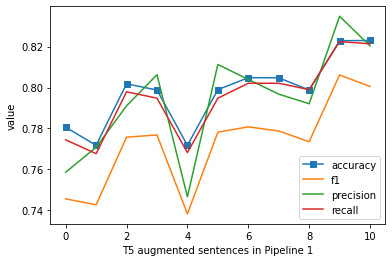

In [45]:
import matplotlib.pyplot as plt
import numpy as np
x=np.arange(0,11)


plt.plot(x,accuracy_p1,marker='s')
plt.plot(x,f1_p1)
plt.plot(x,precision_p1)
plt.plot(x,recall_p1)


# plt.plot(x,f1_p1)
# plt.plot(x,recall_p1)
# plt.plot(x,precision_p1)
plt.legend(["accuracy","f1","precision","recall"],loc='lower right')
plt.ylabel('value')
plt.xlabel('T5 augmented sentences in Pipeline 1')
# save('CV_pipe1.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

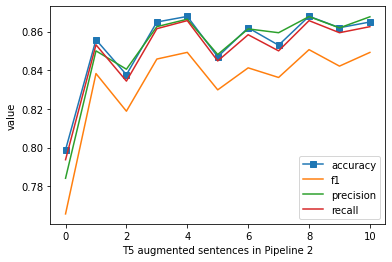

In [36]:
plt.plot(x,accuracy_p2,marker='s')
plt.plot(x,f1_p2)
plt.plot(x,precision_p2)
plt.plot(x,recall_p2)



plt.legend(["accuracy","f1","precision","recall"],loc='lower right')
plt.ylabel('value')
plt.xlabel('T5 augmented sentences in Pipeline 2')
save('CV_pipe2.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

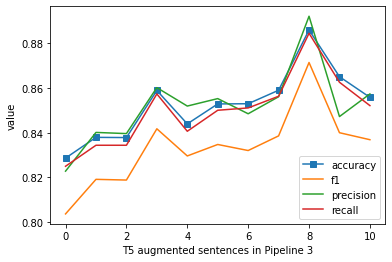

In [37]:
plt.plot(x,accuracy_p3,marker='s')
plt.plot(x,f1_p3)
plt.plot(x,precision_p3)
plt.plot(x,recall_p3)



plt.legend(["accuracy","f1","precision","recall"],loc='lower right')
plt.ylabel('value')
plt.xlabel('T5 augmented sentences in Pipeline 3')
save('CV_pipe3.png')

In [38]:
cv1=accuracy_p1
cv2=accuracy_p2
cv3=accuracy_p3

cs1=accuracy_std1
cs2=accuracy_std2
cs3=accuracy_std3



In [50]:
accuracy_p1[0]=cv1[0]
accuracy_p2[0]=cv2[0]
accuracy_p3[0]=cv3[0]
accuracy_std1[0]=cs1[0]

accuracy_std2[0]=cs2[0]
accuracy_std3[0]=cs3[0]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

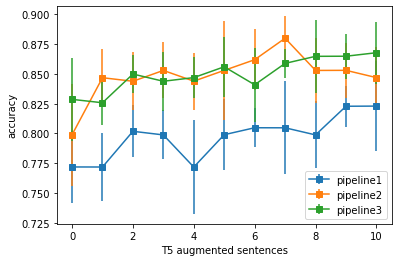

In [52]:
# Noraml T5 data


import matplotlib.pyplot as plt
import numpy as np
x=np.arange(0,11)
error=[accuracy_std1,accuracy_std2,accuracy_std3]
# plt.errorbar(xval, yval, xerr = 0.4, yerr = 0.5)
plt.errorbar(x,accuracy_p1,yerr=accuracy_std1,marker='s')
plt.errorbar(x,accuracy_p2,yerr=accuracy_std2,marker='s')
plt.errorbar(x,accuracy_p3,yerr=accuracy_std3,marker='s')
# plt.plot(x,f1_p1)
# plt.plot(x,recall_p1)
# plt.plot(x,precision_p1)
plt.legend(["pipeline1","pipeline2","pipeline3"],loc='lower right')
plt.ylabel('accuracy')
plt.xlabel('T5 augmented sentences')

save('CL_all_mlp.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

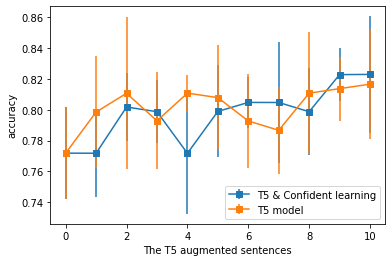

In [53]:
# Noraml T5 data
# compare clean lab with noraml

import matplotlib.pyplot as plt
import numpy as np
x=np.arange(0,11)
error=[accuracy_std1,cs1]
# plt.errorbar(xval, yval, xerr = 0.4, yerr = 0.5)
plt.errorbar(x,accuracy_p1,yerr=accuracy_std1,marker='s')
plt.errorbar(x,cv1,yerr=cs1,marker='s')


plt.legend(["T5 & Confident learning","T5 model"],loc='lower right')
plt.ylabel('accuracy')
plt.xlabel('The T5 augmented sentences')

save('CL_vs_T5_p1.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

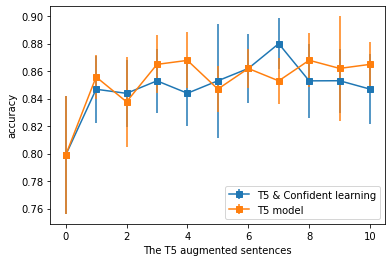

In [54]:
# Noraml T5 data
# compare clean lab with noraml

import matplotlib.pyplot as plt
import numpy as np
x=np.arange(0,11)
error=[accuracy_std2,cs2]
# plt.errorbar(xval, yval, xerr = 0.4, yerr = 0.5)
plt.errorbar(x,accuracy_p2,yerr=accuracy_std2,marker='s')
plt.errorbar(x,cv2,yerr=cs2,marker='s')


plt.legend(["T5 & Confident learning","T5 model"],loc='lower right')
plt.ylabel('accuracy')
plt.xlabel('The T5 augmented sentences')

save('CL_vs_T5_p2.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

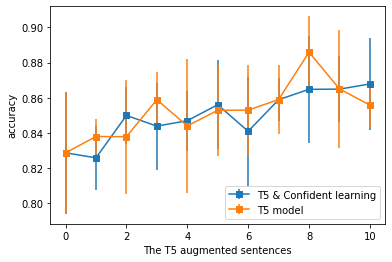

In [56]:
import matplotlib.pyplot as plt
import numpy as np
x=np.arange(0,11)
error=[accuracy_std3,cs3]
# plt.errorbar(xval, yval, xerr = 0.4, yerr = 0.5)
plt.errorbar(x,accuracy_p3,yerr=accuracy_std3,marker='s')
plt.errorbar(x,cv3,yerr=cs3,marker='s')


plt.legend(["T5 & Confident learning","T5 model"],loc='lower right')
plt.ylabel('accuracy')
plt.xlabel('The T5 augmented sentences')

save('CL_vs_T5_p3.png')

Text(0.5, 0, 'T5 augmented sentences')

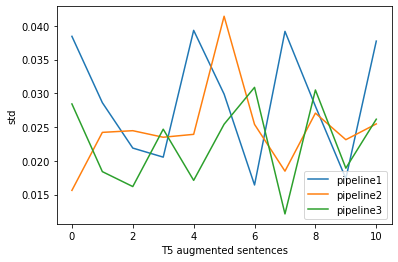

In [ ]:
plt.errorbar(x,accuracy_std1)
plt.errorbar(x,accuracy_std2)
plt.errorbar(x,accuracy_std3)
# plt.plot(x,f1_p1)
# plt.plot(x,recall_p1)
# plt.plot(x,precision_p1)
plt.legend(["pipeline1","pipeline2","pipeline3"],loc='lower right')
plt.ylabel('std')
plt.xlabel('T5 augmented sentences')


In [ ]:
data_size=[524, 784, 1035, 1301, 1548, 1796, 2054, 2298, 2548, 2788, 525, 773, 1035, 1286, 1554, 1805, 2058, 2305, 2567, 2811, 521, 784, 1044, 1304, 1562, 1819, 2087, 2330, 2579, 2831, 524, 781, 1037, 1297, 1553, 1816, 2064, 2329, 2574, 2816, 526, 779, 1037, 1289, 1555, 1806, 2076, 2318, 2572, 2803]
data_size=np.split(np.array(data_size),5)


In [ ]:
data_size

[array([ 524,  784, 1035, 1301, 1548, 1796, 2054, 2298, 2548, 2788]),
 array([ 525,  773, 1035, 1286, 1554, 1805, 2058, 2305, 2567, 2811]),
 array([ 521,  784, 1044, 1304, 1562, 1819, 2087, 2330, 2579, 2831]),
 array([ 524,  781, 1037, 1297, 1553, 1816, 2064, 2329, 2574, 2816]),
 array([ 526,  779, 1037, 1289, 1555, 1806, 2076, 2318, 2572, 2803])]

In [ ]:
num_std=np.std(data_size,axis=0)

In [ ]:
num_result=np.mean(data_size,axis=0)


In [ ]:
num_result

array([ 524. ,  780.2, 1037.6, 1295.4, 1554.4, 1808.4, 2067.8, 2316. ,
       2568. , 2809.8])

In [ ]:
num_std

array([ 1.67332005,  4.06939799,  3.32264955,  6.88767014,  4.49888875,
        8.26075057, 12.13919272, 12.75931033, 10.71447619, 14.21829807])

In [ ]:
!mkdir figure

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

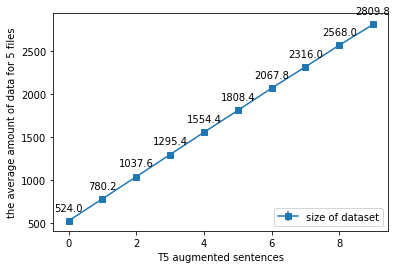

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x=np.arange(0,10)
error=[num_std]
# plt.plot(x,num_result)
# plt.errorbar(xval, yval, xerr = 0.4, yerr = 0.5)
plt.errorbar(x,num_result,yerr=num_std,marker='s')

plt.legend(["size of dataset"],loc='lower right')
plt.ylabel('the average amount of data for 5 files')
plt.xlabel('T5 augmented sentences')

for i,j in zip(x,num_result):
  plt.annotate('{}'.format(j), (i,j), 
               textcoords="offset points", 
                 xytext=(0,10),
                 ha='center')
from google.colab import files

   
plt.savefig('cl_data_size.png')
files.download("cl_data_size.png")

In [ ]:
def save(name):
  from google.colab import files

   
  plt.savefig(name)
  files.download(name)